In [28]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galxy Colors

In [29]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [30]:
from halotools.empirical_models import HodModelFactory

# define the central occupation model
from halotools.empirical_models import TrivialPhaseSpace, Cacciato09Cens
cens_occ_model =  Cacciato09Cens(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Cacciato09Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Cacciato09Sats(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
sats_occ_model._suppress_repeated_param_warning = True
sats_prof_model = NFWPhaseSpace()

# convert luminosity to magnitude
from occupation_model_components import MagnitudesSDSS
central_mag_model = MagnitudesSDSS(gal_type='centrals')
satellite_mag_model = MagnitudesSDSS(gal_type='satellites')

# define quenching model
from halotools.empirical_models import ZuMandelbaum16QuenchingCens, ZuMandelbaum16QuenchingSats
cens_quenching_model = ZuMandelbaum16QuenchingCens(prim_haloprop_key = 'halo_mvir')
sats_quenching_model = ZuMandelbaum16QuenchingSats(prim_haloprop_key = 'halo_mvir')

# define morphology model
from morphology_model_components import Morphology_2 as Morphology
cens_morpholopgy_model = Morphology(gal_type='centrals')
sats_morpholopgy_model = Morphology(gal_type='satellites')

# define shape model
from shape_model_components import PS08Shapes, EllipticalGalaxyShapes, DiskGalaxyShapes
cens_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='centrals')
cens_disk_shape_model       = DiskGalaxyShapes(gal_type='centrals')
sats_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='satellites')
sats_disk_shape_model       = DiskGalaxyShapes(gal_type='satellites')

# define alignment model
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
central_orientation_model = RandomAlignment(gal_type='centrals')
satellite_orientation_model = RandomAlignment(gal_type='satellites')

# projected shapes
from shape_model_components import ProjectedShapes
central_proj_shapes_model = ProjectedShapes('centrals')
satellite_proj_shapes_model = ProjectedShapes('satellites')

# extinction model
from extinction_model_components import Shao07DustExtinction
central_extinction_model = Shao07DustExtinction(gal_type='centrals')
satellite_extinction_model = Shao07DustExtinction(gal_type='satellites')

# color model
from color_model_components import GalaxyColor
central_color_model = GalaxyColor(gal_type='centrals')
satellite_color_model = GalaxyColor(gal_type='satellites')

central_color_model.params['']

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 centrals_mag_model = central_mag_model,
                                 satellites_mag_model = satellite_mag_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_quenching = cens_quenching_model,
                                 satellites_quenching = sats_quenching_model,
                                 centrals_morphology = cens_morpholopgy_model,
                                 satellites_morphology = sats_morpholopgy_model,
                                 centrals_elliptical_galaxy_shape = cens_elliptical_shape_model,
                                 centrals_disk_galaxy_shape = cens_disk_shape_model,
                                 satellites_elliptical_galaxy_shape = sats_elliptical_shape_model,
                                 satellites_disk_galaxy_shape = sats_disk_shape_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 centrals_proj_shapes = central_proj_shapes_model,
                                 satellites_proj_shapes = satellite_proj_shapes_model,
                                 centrals_color_model = central_color_model,
                                 satellites_color_model = satellite_color_model,
                                 centrals_extinction_model = central_extinction_model,
                                 satellites_extinction_model = satellite_extinction_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_mag_model',
                                 'satellites_mag_model',
                                 'centrals_quenching',
                                 'satellites_quenching',
                                 'centrals_morphology',
                                 'satellites_morphology',
                                 'centrals_elliptical_galaxy_shape',
                                 'centrals_disk_galaxy_shape',
                                 'satellites_elliptical_galaxy_shape',
                                 'satellites_disk_galaxy_shape',
                                 'centrals_orientation',
                                 'satellites_orientation',
                                 'centrals_proj_shapes',
                                 'satellites_proj_shapes',
                                 'centrals_color_model',
                                 'satellites_color_model',
                                 'centrals_extinction_model',
                                 'satellites_extinction_model',)
                                )

In [4]:
# populate mock catalog
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table

N_gal = len(mock)
print("number of galaxies: ", N_gal)

f_sat = 1.0*np.sum(mock['gal_type']=='satellites')/N_gal
print("satellite fraction: ", f_sat)

f_quiescent = 1.0*np.sum(mock['quiescent']==True)/N_gal
print("quiescent fraction: ", f_quiescent)

/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


number of galaxies:  542938
satellite fraction:  0.272675701461
quiescent fraction:  0.523304686723


In [5]:
mock.colnames

['halo_upid',
 'halo_hostid',
 'conc_NFWmodel',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rvir',
 'halo_mvir',
 'halo_id',
 'halo_num_centrals',
 'halo_num_satellites',
 'gal_type',
 'galaxy_b_to_a',
 'galaxy_axisC_y',
 'galaxy_axisC_z',
 'galaxy_g_minus_r',
 'vx',
 'host_centric_distance',
 'galaxy_c_to_b',
 'vy',
 'vz',
 'disk',
 'galaxy_c_to_a',
 'deltaMag_u',
 'deltaMag_i',
 'galaxy_axisC_x',
 'deltaMag_r',
 'elliptical',
 'galaxy_projected_b_to_a',
 'deltaMag_z',
 'galaxy_phi',
 'deltaMag_g',
 'quiescent',
 'galaxy_axisA_z',
 'galaxy_axisA_x',
 'galaxy_axisA_y',
 'luminosity',
 'galaxy_axisB_y',
 'galaxy_axisB_x',
 'galaxy_axisB_z',
 'galaxy_theta',
 'Mag_r',
 'y',
 'x',
 'z']

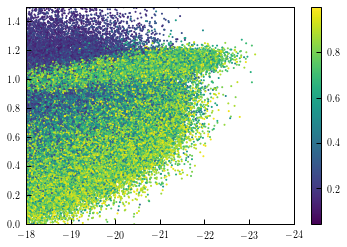

In [30]:
plt.figure()
plt.scatter(mock['Mag_r'] + mock['deltaMag_r'],
            mock['galaxy_g_minus_r'] + (mock['deltaMag_g']-mock['deltaMag_r']),
            s=1, alpha=1, c=mock['galaxy_projected_b_to_a'])
plt.ylim([0,1.5])
plt.xlim([-18,-24])
plt.colorbar()
plt.show()

In [27]:
mag_bins = np.arange(-23,-18,0.2)[::-1]
mag_bin_centers = (mag_bins[:-1]+mag_bins[1:])/2.0
color_bins = np.arange(0,1.4,0.05)
xsample=np.linspace(0,1.5,1000)

color = mock['galaxy_g_minus_r'] + (mock['deltaMag_g']-mock['deltaMag_r'])
color_0 = mock['galaxy_g_minus_r']

mag = mock['Mag_r'] + mock['deltaMag_r']
mag = mock['Mag_r']

# row and column sharing
fig, axes = plt.subplots(6, 5, sharex=True, sharey=False, figsize=(14.0,14.0))
axes = axes.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

N = len(mag_bins)-1
m1s = np.zeros(N)
m2s = np.zeros(N)
s1s = np.zeros(N)
s2s = np.zeros(N)
fs = np.zeros(N)
for i in range(0,N):
    mask = (mag<mag_bins[i]) & (mag>mag_bins[i+1])
    N = np.sum(mask)
    
    counts_0 = np.histogram(color[mask], bins=color_bins)[0]
    counts = 1.0*counts_0/np.sum(counts_0)/np.diff(color_bins)
    ax = axes[i]
    ax.step(color_bins[:-1], counts, where='post', color='black')
    
    counts = np.histogram(color[mask & mock['disk']], bins=color_bins)[0]
    counts_b1 = 1.0*counts/np.sum(counts_0)/np.diff(color_bins)
    ax = axes[i]
    ax.step(color_bins[:-1], counts_b1, where='post', color='blue')
    
    counts = np.histogram(color_0[mask & mock['disk']], bins=color_bins)[0]
    counts_b2 = 1.0*counts/np.sum(counts_0)/np.diff(color_bins)
    ax = axes[i]
    ax.step(color_bins[:-1], counts_b2, where='post', color='cyan')
    
    counts = np.histogram(color[mask & mock['elliptical']], bins=color_bins)[0]
    counts_r = 1.0*counts/np.sum(counts_0)/np.diff(color_bins)
    ax = axes[i]
    ax.step(color_bins[:-1], counts_r, where='post', color='red')

ax.set_xlim([0,1.5])
plt.show()

NameError: name 'mock' is not defined

In [1]:
from color_model_components import GalaxyColor, blue_fraction
color_model = GalaxyColor() 

In [25]:
N = 10**6
min_mag = -24
max_mag = -17
mag = np.random.random(N)*(max_mag-min_mag) + min_mag

c_et = color_model.et_rvs_color(mag[:N/2])
c_lt = color_model.lt_rvs_color(mag[N/2:])
color = np.hstack((c_et,c_lt))

w[N/2:] = blue_fraction(mag[N/2:])
w[:N/2] = 1.0-blue_fraction(mag[:N/2])

(0, 28993)
(1, 28317)
(2, 28645)
(3, 28843)
(4, 28554)
(5, 28416)
(6, 28698)
(7, 28487)
(8, 28625)
(9, 28637)
(10, 28588)
(11, 28646)
(12, 28398)
(13, 28539)
(14, 28703)
(15, 28493)
(16, 28373)
(17, 28590)
(18, 28389)
(19, 28474)
(20, 28857)
(21, 28520)
(22, 28420)
(23, 28523)
(24, 28418)
(25, 28770)
(26, 28659)
(27, 28401)
(28, 28630)


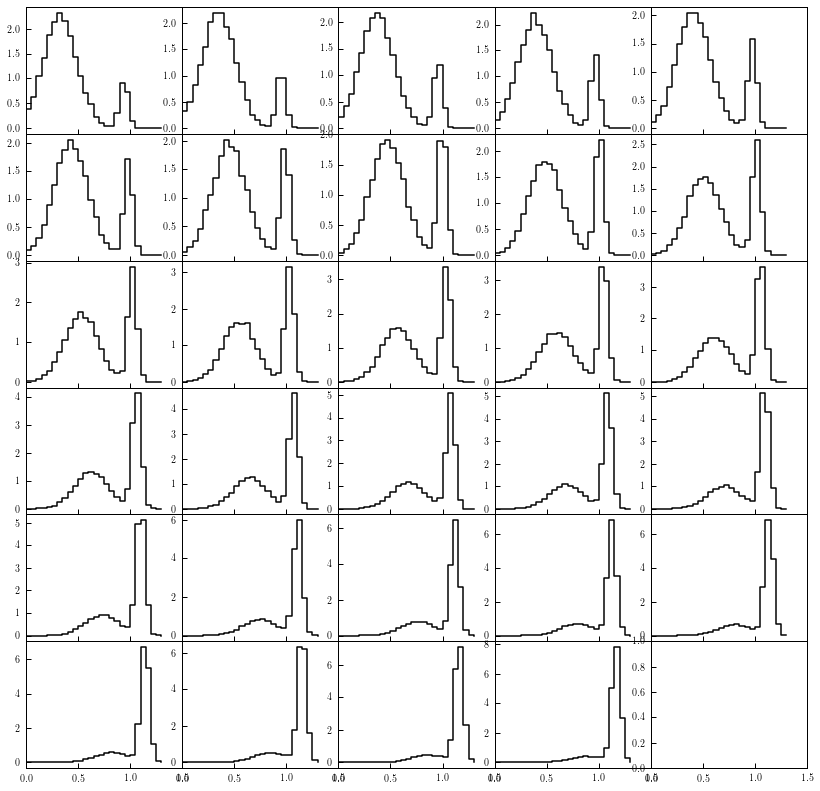

In [26]:
mag_bins = np.arange(-23,-17,0.2)[::-1]
mag_bin_centers = (mag_bins[:-1]+mag_bins[1:])/2.0
color_bins = np.arange(0,1.4,0.05)

# row and column sharing
fig, axes = plt.subplots(6, 5, sharex=True, sharey=False, figsize=(14.0,14.0))
axes = axes.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

N = len(mag_bins)-1
for i in range(0,N):
    mask = (mag<mag_bins[i]) & (mag>mag_bins[i+1])
    N = np.sum(mask)
    print(i, N)
    
    counts_0 = np.histogram(color[mask], bins=color_bins, weights=w[mask])[0]
    counts = 1.0*counts_0/np.sum(counts_0)/np.diff(color_bins)
    ax = axes[i]
    ax.step(color_bins[:-1], counts, where='post', color='black')
    
ax.set_xlim([0,1.5])
plt.show()